In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

df=pd.read_csv(r"C:\Users\Administrator\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


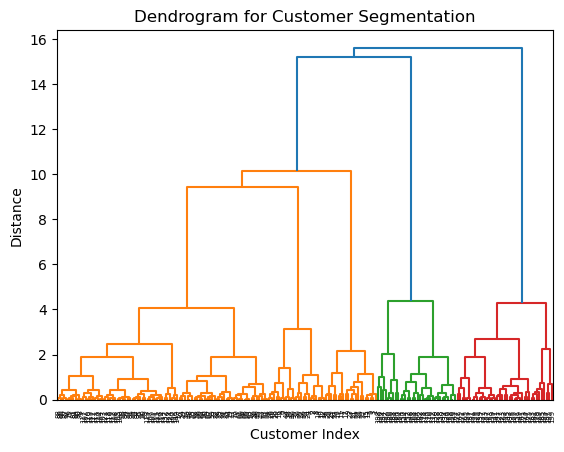

In [3]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

linked=linkage(X_scaled,method='ward')

dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False
)
plt.title("Dendrogram for Customer Segmentation")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()



In [5]:
hc=AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

labels=hc.fit_predict(X_scaled)

df['clusters']=labels

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


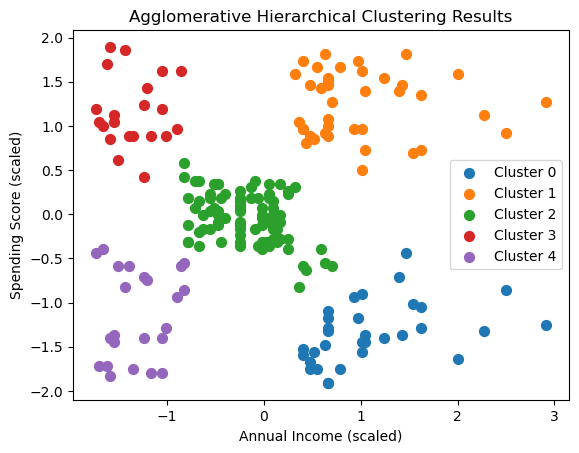

In [6]:
for cluster in np.unique(labels):
    plt.scatter(
        X_scaled[labels == cluster, 0],
        X_scaled[labels == cluster, 1],
        label=f"Cluster {cluster}", s=50
    )

plt.title("Agglomerative Hierarchical Clustering Results")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()